 # Complex solution to a simple problem

 My brother asked me for help with his homework. The problem was to find the relationship between $x$ and $y$ in the following table
 
 |$x$ |$y$ |
 |----|----|
 | 2  | 10 |
 | 3  | 15 |
 | 5  | 25 |
 | 10 | 50 |

 If we plot these points we get the following

Text(0, 0.5, 'y')

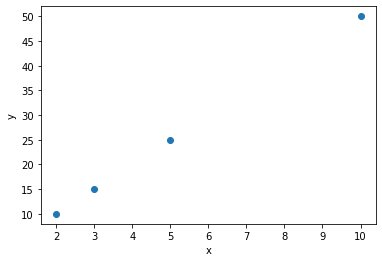

In [1]:
import numpy as np

x = np.array([2,3,5,10])
y = np.array([10,15,25,50])

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

 The answer is obviously $y = 5x$. If we plot that function on top of the lines we get

Text(0, 0.5, 'y')

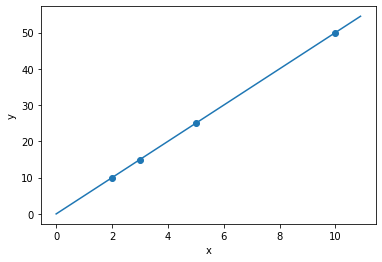

In [2]:
def plot_function(f, from_x, to_x, steps=0.1, label=None):
    x = np.arange(from_x, to_x, steps)
    y = f(x)
    plt.plot(x, y, label=label)

def solution_polynomial(x):
    return x * 5

plt.scatter(x, y)
plot_function(solution_polynomial, 0, 11, 0.1)
plt.xlabel('x')
plt.ylabel('y')

 But there is actually an infinite number of solutions to this problem.

 But first, lets look at a simpler case. Consider the following data instead.

 |$x$ |$y$ |
 |----|----|
 | 2  | 10 |

 It can be plotted as only a point at (2, 10)

Text(0, 0.5, 'y')

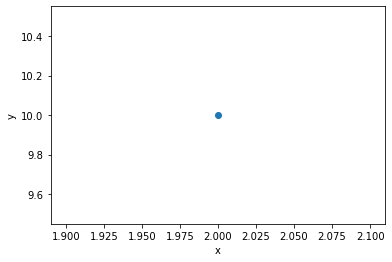

In [3]:
x = np.array([2])
y = np.array([10])
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

The simplest solution is then just $y = 10$ (0th degree polynomial)

Text(0, 0.5, 'y')

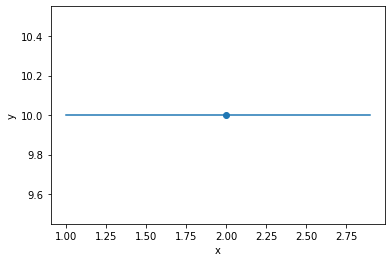

In [5]:
def f(x):
    return np.repeat(10, len(x))

plt.scatter(x, y)
plot_function(f, 1, 3, 0.1)
plt.xlabel('x')
plt.ylabel('y')

 But if you increase the complexity to a first degree polynomial ($y = a + bx$) you can get an infinite nr of solutions. (Since you have more parameters than data).
 For example $y = x + 8$, $y = 2x + 6$ or $y = 5x$

Text(0, 0.5, 'y')

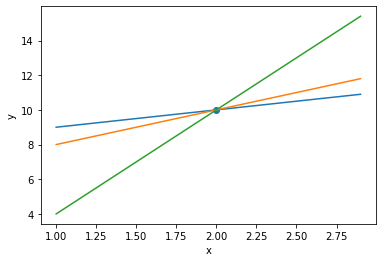

In [6]:
def f_1(x):
    return x + 8

def f_2(x):
    return 2*x + 6

def f_3(x):
    return 6*x-2

plt.scatter(x, y)
plot_function(f_1, 1, 3, 0.1, 'y = x + 8')
plot_function(f_2, 1, 3, 0.1, 'y = 2x + 6')
plot_function(f_3, 1, 3, 0.1, 'y = 6x - 2')
plt.xlabel('x')
plt.ylabel('y')

 Consider now the problem with 2 data points.
 
 | x  | y  |
 |----|----|
 | 2  | 10 |
 | 3  | 15 |

Text(0, 0.5, 'y')

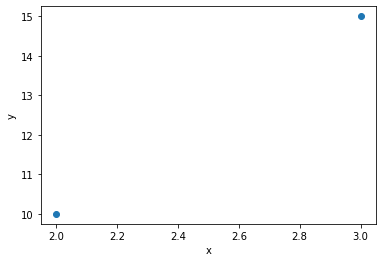

In [7]:
x = np.array([2, 3])
y = np.array([10, 15])
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

 We only have one first degree polynomial to fit these points ($y = 5x$)

Text(0, 0.5, 'y')

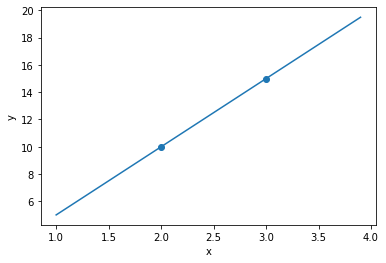

In [8]:
def f(x):
    return 5*x

plt.scatter(x, y)
plot_function(f, 1, 4, 0.1)
plt.xlabel('x')
plt.ylabel('y')

 But we could here make infinite nr of second degree polynomials ($y=a+bx+cx^2$) to fit this curve. For example:
 * $y=x^2+6$
 * $y=2x^2-5x+12$
 * $y=3x^2-10x+18$

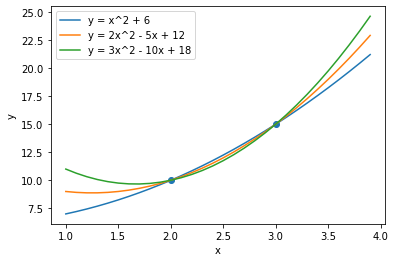

In [9]:
def f_1(x):
    return x**2 + 6

def f_2(x):
    return 2*(x**2) - 5*x + 12

def f_3(x):
    return 3*(x**2) - 10*x + 18

plt.scatter(x, y)
plot_function(f_1, 1, 4, 0.1, 'y = x^2 + 6')
plot_function(f_2, 1, 4, 0.1, 'y = 2x^2 - 5x + 12')
plot_function(f_3, 1, 4, 0.1, 'y = 3x^2 - 10x + 18')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

 So, if we want to have an infinite amount of solutions, we can just have the same degree of the polynomial as the nr of data-points.

 The same logic could then be applied to my brothers homework.

 He had four datapoints

 |$x$ |$y$ |
 |----|----|
 | 2  | 10 |
 | 3  | 15 |
 | 5  | 25 |
 | 10 | 50 |

 We can then make a polynomial of the fourth degree to get an infinite nr of solutions for the assignment.

 We can then write the polynomial as $a+bx+cx^2+dx^3+ex^4$ and write the coefficient matrix as follows

In [10]:
x = np.array([2,3,5,10])
y = np.array([10,15,25,50])

X = np.array([[x_i**p for p in range(5)] for x_i in x])


 Then we can fix last variable ($e$ in $ex^4$)

In [11]:
e = 1


 Since e is now constant we can subtract that column on both sides


In [12]:
y_2 = y - e*X[:,4]
X = X[:,0:4]


 We can now find a solution using Numpy


In [13]:
solution_coefs = np.linalg.solve(X, y_2)
solution_coefs = np.append(solution_coefs, e)

def polynomial_string(coefs):
    return_str = ''

    for i, coef in enumerate(coefs):
        if coef != 0:
            return_str += f' {coef:+g}x^{i}'

    return return_str[2:]\
        .replace('x^0', '')\
        .replace('x^1', 'x')\
        .replace('+', '+ ')\
        .replace('-', '- ')\
        .replace(' 1x', ' x')


print(f'These are the coefficients: {solution_coefs}')
print(f'We thus get the polynomial: {polynomial_string(solution_coefs)}')

These are the coefs: [ 300. -335.  131.  -20.    1.]
We thus get the polynomial: 300 - 335x + 131x^2 - 20x^3 + x^4



 Then we can plot the new polynomial


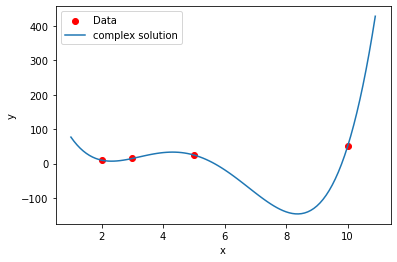

In [14]:
def make_polynomial(coefs):
    def polynomial(x):
        return sum([s*x**p for s,p in zip(coefs, range(len(coefs)))])

    return polynomial

solution_polynomial_complex = make_polynomial(solution_coefs)



plt.scatter(x, y, c='r', label='Data')
plot_function(solution_polynomial_complex, 1, 11, label='complex solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


 As we can see both the simple solution and the more complex solution hits all the data points


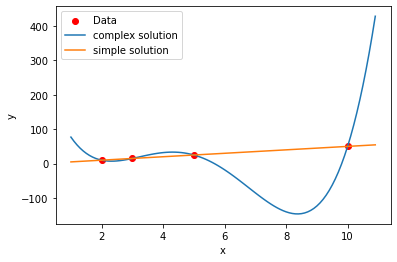

In [15]:
plt.scatter(x, y, c='r', label='Data')
plot_function(solution_polynomial_complex, 1, 11, label='complex solution')
plot_function(solution_polynomial, 1, 11, label='simple solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

So, a possible solution to the homework, other than $y=5x$, is $y=300 - 335x + 131x^2 - 20x^3 + x^4$.

We can now repeat the process but instead set $e$ to any value to get an infinite nr of solutions to the problem.